Lecture 13: Classification

In [1]:
"""
Created on Mon Sep 19 11:45:20 2016

@author: johnguttag
"""
import pylab, random

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

In [2]:
def minkowskiDist(v1, v2, p):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between v1 and v2"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [4]:
class Animal(object):
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = pylab.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        """Assumes other an Animal
           Returns the Euclidean distance between feature vectors
              of self and other"""
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 2)
                             
    def __str__(self):
        return self.name

In [5]:
#Actual number of legs
cobra = Animal('cobra', [1,1,1,1,0])
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
chicken = Animal('chicken', [1,1,0,1,2])
alligator = Animal('alligator', [1,1,0,1,4])
dartFrog = Animal('dart frog', [1,0,1,0,4])
zebra = Animal('zebra', [0,0,0,0,4])
python = Animal('python', [1,1,0,1,0])
guppy = Animal('guppy', [0,1,0,0,0])
animals = [cobra, rattlesnake, boa, chicken, guppy,
           dartFrog, zebra, python, alligator]

#Binary features only           
cobra = Animal('cobra', [1,1,1,1,0])
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
chicken = Animal('chicken', [1,1,0,1,2])
alligator = Animal('alligator', [1,1,0,1,1])
dartFrog = Animal('dart frog', [1,0,1,0,1])
zebra = Animal('zebra', [0,0,0,0,1])
python = Animal('python', [1,1,0,1,0])
guppy = Animal('guppy', [0,1,0,0,0])
animals = [cobra, rattlesnake, boa, chicken, guppy,
           dartFrog, zebra, python, alligator]

In [6]:
def compareAnimals(animals, precision):
    """Assumes animals is a list of animals, precision an int >= 0
       Builds a table of Euclidean distance between each animal"""
    #Get labels for columns and rows
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:]
    tableVals = []
    #Get distances between pairs of animals
    #For each row
    for a1 in animals:
        row = []
        #For each column
        for a2 in animals:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
    #Produce table
    table = pylab.table(rowLabels = rowLabels,
                        colLabels = columnLabels,
                        cellText = tableVals,
                        cellLoc = 'center',
                        loc = 'center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.5)
    pylab.axis('off')
    pylab.savefig('distances')

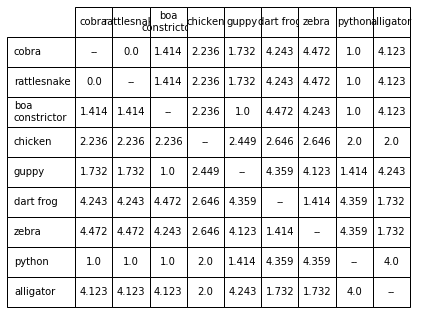

In [9]:
compareAnimals(animals, 3)
# assert False